<a href="https://colab.research.google.com/github/Vaishnavisharan/Machine_Learning-Project/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


IMPORT LIBIRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATA SET

In [ ]:
train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(2671, 10)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PLOTTING SECTION

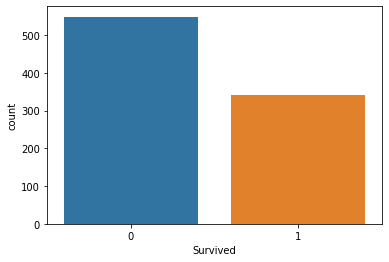

In [ ]:
sns.countplot(x='Survived',data=train)

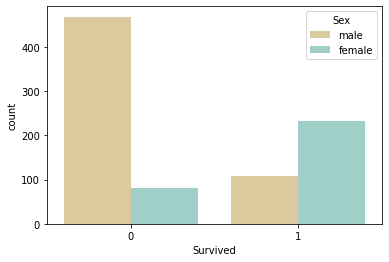

In [ ]:
sns.countplot(x="Survived",hue="Sex",data=train,palette="BrBG")

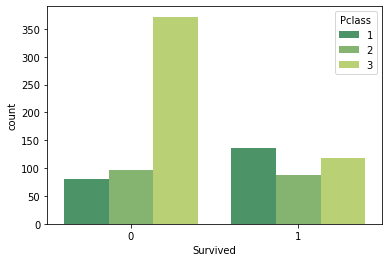

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data=train,palette="summer")

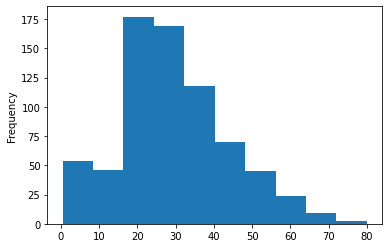

In [ ]:
train["Age"].plot.hist()

DATA WRANGALING 

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.dropna(inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

DATA PRE PROCESSING 

In [ ]:
pd.get_dummies(train['Sex'])

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [ ]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Sex.head(3)

,male
1,0
3,0
6,1


In [ ]:
pd.get_dummies(train['Pclass'])

,1,2,3
1,1,0,0
3,1,0,0
6,1,0,0
10,0,0,1
11,1,0,0
...,...,...,...
871,1,0,0
872,1,0,0
879,1,0,0
887,1,0,0


In [ ]:
Pcl=pd.get_dummies(train['Pclass'],drop_first=True)
Pcl.head(3)

,2,3
1,0,0
3,0,0
6,0,0


In [ ]:
pd.get_dummies(train['Embarked'])
Embarked=pd.get_dummies(train['Embarked'])
Embarked.head(3)

,C,Q,S
1,1,0,0
3,0,0,1
6,0,0,1


In [ ]:
train=pd.concat([train,Sex,Pcl,Embarked],axis=1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,2,3,C,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0,0,0,1


In [ ]:
train.drop(['Name','PassengerId','Sex','Embarked','Pclass','Ticket','Cabin'], axis=1,inplace=True)
train.head(3)

,Survived,Age,SibSp,Parch,Fare,male,2,3,C,Q,S
1,1,38.0,1,0,71.2833,0,0,0,1,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,0,1


ASSINING THE X AND Y VALUES

In [ ]:
X=train.drop('Survived',axis=1)
y=train['Survived']

TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=6)

LOGISTIC REGRESSION 

In [ ]:
from sklearn.linear_model import LogisticRegression
ln= LogisticRegression()

In [ ]:
ln.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Train_score:", ln.score(X_train,y_train))
print("Test_score:",ln.score(X_test,y_test))

Train_score: 0.78125
Test_score: 0.7636363636363637


In [ ]:
prediction=ln.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[11,  8],
       [ 5, 31]])

 RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Train_score:", rf.score(X_train,y_train))
print("Test_score:",rf.score(X_test,y_test))

Train_score: 0.7421875
Test_score: 1.0


In [ ]:
prediction=rf.predict(X_test)

In [ ]:
confusion_matrix(y_test,prediction)

array([[19,  0],
       [ 0, 36]])

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("Train_score:", dtc.score(X_train,y_train))
print("Test_score:",dtc.score(X_test,y_test))

Train_score: 0.734375
Test_score: 1.0


In [ ]:
prediction=dtc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[19,  0],
       [ 0, 36]])

NAVIE BAYES

In [ ]:
from sklearn.naive_bayes import  GaussianNB
gnb= GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print("Train_score:", gnb.score(X_train,y_train))
print("Test_score:",gnb.score(X_test,y_test))

Train_score: 0.75
Test_score: 0.7454545454545455


In [ ]:
prediction=gnb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[15,  4],
       [10, 26]])

SUPPORT VECTION CLASSIFIER

In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Train_score:", svc.score(X_train,y_train))
print("Test_score:",svc.score(X_test,y_test))

Train_score: 0.6796875
Test_score: 0.6545454545454545


In [ ]:
prediction=svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[ 0, 19],
       [ 0, 36]])

KNEIGHBORS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

In [ ]:
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("Train_score:", knc.score(X_train,y_train))
print("Test_score:",knc.score(X_test,y_test))

Train_score: 0.6328125
Test_score: 0.7636363636363637


In [ ]:
prediction=knc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[ 0, 19],
       [ 0, 36]])